In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
from sys import argv
from sklearn.metrics.pairwise import manhattan_distances
from tqdm import tqdm
from scipy.stats import chi2_contingency

In [2]:
names = ['bib', 'book1', 'book2', 'geo', 'news', 
         'obj1', 'obj2', 'paper1', 'paper2', 'pic', 
         'progc', 'progl', 'progp', 'trans']
folder_path = 'calgarycorpus'

bits_in_byte = 256
files_in_collection = len(names)

# 1. Byte frequencies

In [3]:
byte_frequencies = np.zeros((files_in_collection, bits_in_byte))

for file_index in range(files_in_collection):
    file_name = names[file_index]
    content = bytearray(open(folder_path + '/' + file_name, 'rb').read())
    byte_frequencies[file_index, :], _ = np.histogram(content, bins=np.arange(bits_in_byte + 1), density=True)

In [4]:
with open('byte_frequencies.csv', 'w', newline='') as byte_frequencies_file:
    byte_frequencies_writer = csv.writer(byte_frequencies_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    for file_index in range(files_in_collection):
        byte_frequencies_writer.writerow(byte_frequencies[file_index, :])

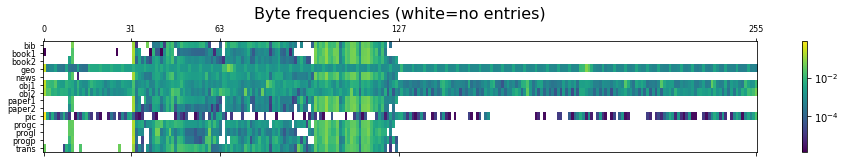

In [5]:
plt.matshow(byte_frequencies, norm=matplotlib.colors.LogNorm())
plt.axis('tight')
plt.xticks([0, 31, 63, 127, 255], fontsize=8)
plt.yticks(range(len(byte_frequencies)), names, fontsize=8)
plt.colorbar()
plt.title('Byte frequencies (white=no entries)', fontsize=16)
plt.show()

In [6]:
byte_entries = np.zeros((files_in_collection, bits_in_byte), dtype=int)

for file_index in range(files_in_collection):
    file_name = names[file_index]
    content = bytearray(open(folder_path + '/' + file_name, 'rb').read())
    byte_entries[file_index, :], _ = np.histogram(content, bins=np.arange(bits_in_byte + 1), density=False)
    
with open('byte_entries.csv', 'w', newline='') as byte_entries_file:
    byte_entries_writer = csv.writer(byte_entries_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    for file_index in range(files_in_collection):
        byte_entries_writer.writerow(byte_entries[file_index, :])

## 1.2 Total variation distance between byte frequencies ($l_1$, Manhattan) 

In [7]:
frequencies_manhattan_distances = manhattan_distances(byte_frequencies, byte_frequencies)

In [8]:
np.savetxt("frequencies_manhattan_distances.csv", frequencies_manhattan_distances, delimiter=",")

Text(0.5, 1.0, 'Pairwise $l_1$ (Manhattan) distances')

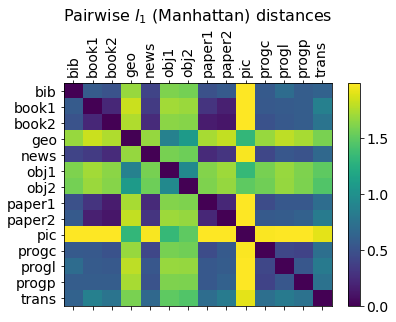

In [9]:
f = plt.figure()
plt.matshow(frequencies_manhattan_distances, fignum=f.number)
plt.xticks(range(len(names)), names, fontsize=14, rotation=90)
plt.yticks(range(len(names)), names, fontsize=14)
plt.axis('tight')
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Pairwise $l_1$ (Manhattan) distances', fontsize=16)